In [16]:
import pandas as pd

In [17]:
def filllonglat(row):
    country = row['country']
    if pd.isna(row['latitude']):
        if country in averages.index:
            row['latitude'] = averages.loc[country, 'latitude']
    if pd.isna(row['longitude']):
        if country in averages.index:
            row['longitude'] = averages.loc[country, 'longitude']
    return row

In [18]:
# Processing part 1
data = pd.read_csv("EuCitiesTemperatures.csv")
df = pd.DataFrame(data)
averages = df.groupby('country')[['latitude', 'longitude']].mean().round(2)
df = df.apply(filllonglat, axis=1)
print(df)

          city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no     47.85   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes     53.55   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08        15.18  
1         1.52          NaN  
2        11.41         4.54  
3        14.02         6.91

In [19]:
# Processing part 2
subset = df[
    (df['latitude'] >= 40) & (df['latitude'] <= 60) & 
    (df['longitude'] >= 15) & (df['longitude'] <= 30)
]
citycounts = subset['country'].value_counts()
maxcount = citycounts.max()
maxcountries = citycounts[citycounts == maxcount]
print("Countries with the maximum number of cities in the specified geographic band:")
print(maxcountries)

Countries with the maximum number of cities in the specified geographic band:
country
Romania    9
Poland     9
Name: count, dtype: int64


In [20]:
# Processing part 3
df['region'] = df.apply(lambda x: ('EU' if x['EU']=='yes' else 'other') + '-' + ('coast' if x['coastline']=='yes' else 'inland'), axis=1)
avgtemps = df.groupby('region')['temperature'].mean()
def filltemps(row):
    if pd.isna(row['temperature']):
        region = row['region']
        if region in avgtemps.index:
            row['temperature'] = avgtemps[region]
    return row
df = df.apply(filltemps, axis=1)
print(df)

          city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no     47.85   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes     53.55   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature        region  
0        20.08    15.180000   other-coast  
1         1.52     7.481538  other-inland  
2        11.41 

In [21]:
import matplotlib.pyplot as plt

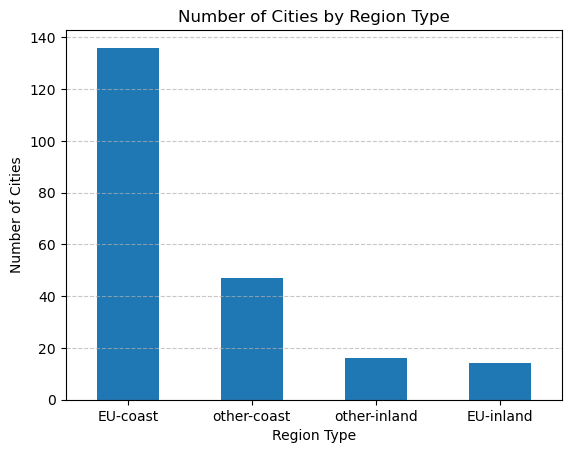

In [25]:
# Visualization part 1
regioncounts = df['region'].value_counts()
regioncounts.plot(kind='bar')
plt.title('Number of Cities by Region Type')
plt.xlabel('Region Type')
plt.ylabel('Number of Cities')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

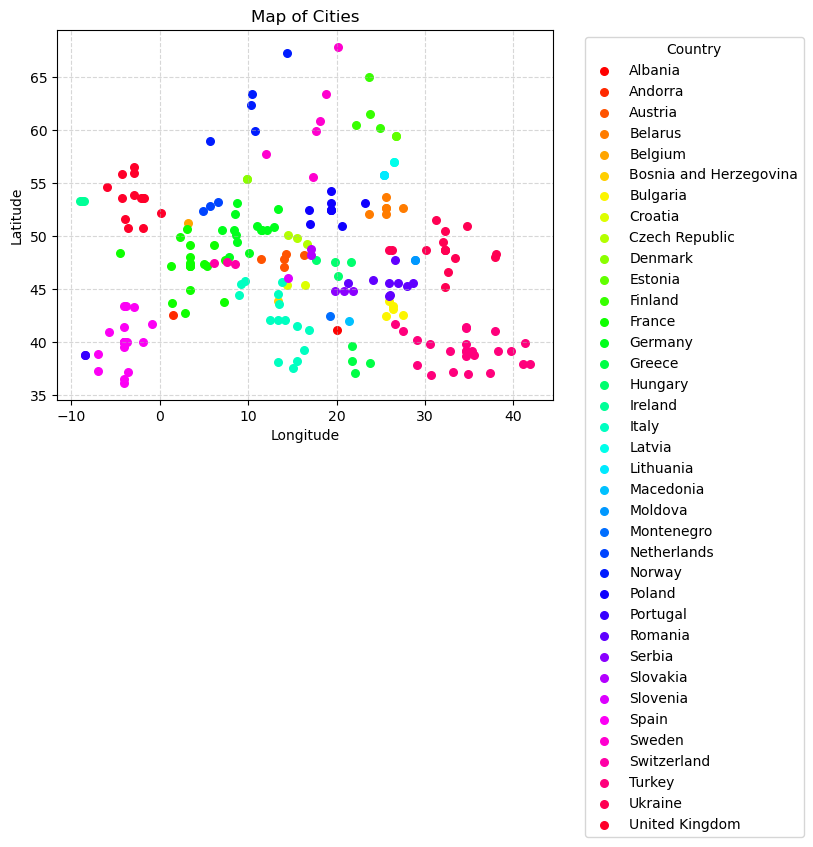

In [38]:
# Visualization part 2
colors = {country: plt.cm.hsv(i*7) for i, country in enumerate(df['country'].unique())}
plt.figure()
for country, color in colors.items():
    cities = df[df['country'] == country]
    plt.scatter(cities['longitude'], cities['latitude'], label=country, color=color, s=30)
plt.title('Map of Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

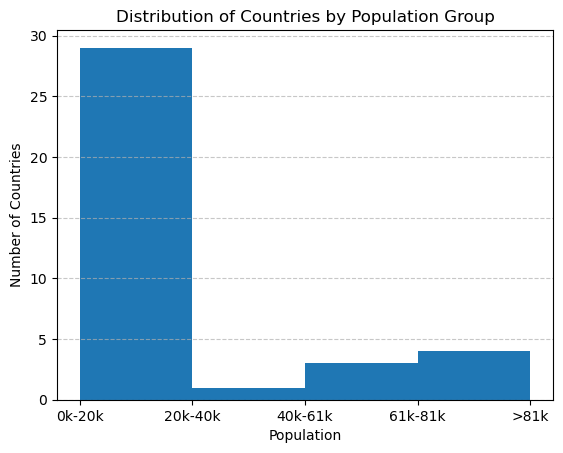

In [50]:
# Visualization part 3
upper = df['population'].max()
lower = df['population'].min()
interval = (upper - lower )/ 4
bins = [lower, lower + interval, lower + (2 * interval), lower + (3*interval), upper]
populations = {}
for index, row in df.iterrows():
    if row['country'] in populations:
        pass
    else:
        populations[row['country']] = row['population']
populationvals = populations.values()
pops = pd.DataFrame(populationvals)
plt.hist(pops, bins=bins)
plt.title('Distribution of Countries by Population Group')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
bound2 = round(lower + 2 * interval)
bound3 = round(lower + 3 * interval)
bound1 = round(lower + interval)
tick1 = str(round(lower)) + 'k-' + str(bound1) + 'k'
tick2 = str(bound1) + 'k-' + str(bound2) + 'k'
tick3 = str(bound2) + 'k-' + str(bound3) + 'k'
tick4 = str(bound3) + 'k-' + str(round(upper)) + 'k'
tick5 = '>' + str(round(upper)) + 'k'
plt.xticks(bins, [tick1, tick2, tick3, tick4, tick5])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

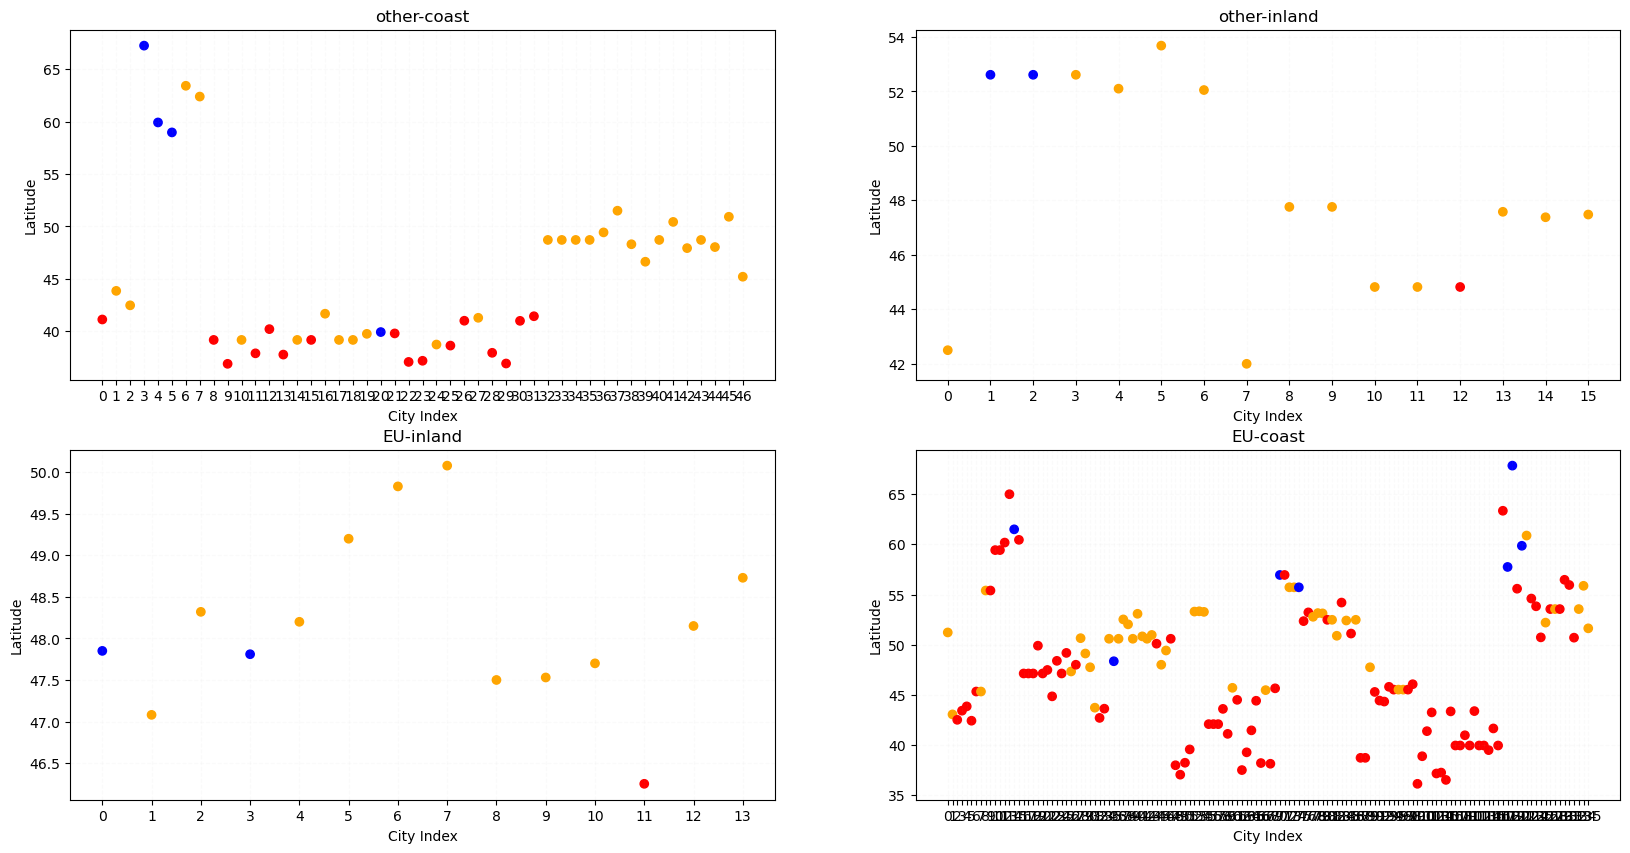

In [62]:
# Visualization part 4
def color(temp):
    if temp > 10:
        return 'red'
    elif temp < 6:
        return 'blue'
    else:
        return 'orange'
regions = df['region'].unique()
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for i, regions in enumerate(regions):
    ax = axes[i // 2, i % 2]
    regiondf = df[df['region'] == regions]
    colors = regiondf['temperature'].apply(color)
    ax.scatter(range(len(regiondf)), regiondf['latitude'], c=colors)
    ax.set_title(regions)
    ax.set_xlabel('City Index')
    ax.set_ylabel('Latitude')
    ax.set_xticks(range(len(regiondf)))
    ax.set_xticklabels(range(len(regiondf)), rotation=0)
    ax.grid(True, linestyle='--', alpha=0.05)
plt.show()